# Analysis 200
## Purpose
* This notebook will continue the analysis portion of our project.
* Our analysis into our first Research Question, 'How has the game of tennis developed since 1968?', is continued in this notebook.

## Datasets
* atp_main, atp_small. All of these dataframes have been saved as CSVs in a 'source' folder.

In [1]:
# Importing relevant libraries
import os
import sys
import hashlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
    
%matplotlib inline

In [2]:
if not os.path.exists( "../data/atp_main" ):
    print("Missing project!")
print("Success!")

Success!


In [3]:
# Open and read these three dataframes
atp_main = pd.read_csv("../data/atp_main", low_memory = False, index_col = 'tourney_date')

In [4]:
atp_main.index = pd.to_datetime(atp_main.index, format="%Y-%m-%d", errors='coerce')

In [5]:
atp_small = pd.read_csv("../data/atp_small", low_memory = False)

## The Ace
* The Ace in tennis occurs when a player is unable to touch or hit the ball that has been served to them. This could be due to the speed of the ball being too quick or because it bounces at an angle that makes it impossible to reach.
* The outcome of an ace is that the server wins the point.
* A strong server will pick up many aces in a match and will make it very hard for the opponent to win any of these points.
* Where do aces occur and what kind of player typically hits an ace?

Text(0.5,1,'Histogram showing distribution of aces 1990-2015')

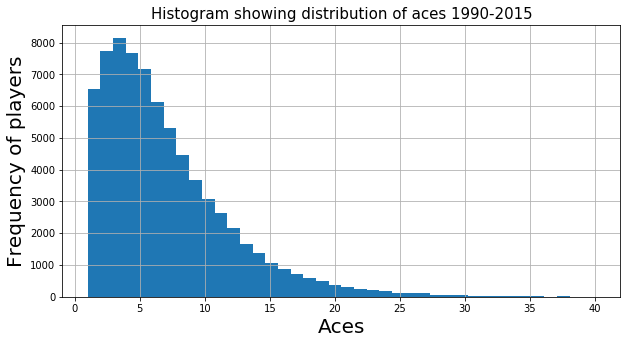

In [6]:
atp_main['w_ace'].hist(bins=40, range=(1,40), figsize = (10,5))
plt.xlabel('Aces', fontsize=20)
plt.ylabel('Frequency of players', fontsize=20)
plt.grid(True)
plt.title('Histogram showing distribution of aces 1990-2015', fontsize=15)

* Typically, most players hit between 1 and 6 aces per match, on average. But what surface do they hit them the most? Who hits them most often?

### Surface and the ace

In [7]:
# creating smaller dataframe for 90's so its easier to call upon this decade for comparison
early_years = atp_main['1990':'2000']

In [8]:
# creating smaller 00's dataframe
later_years = atp_main['2005':'2015']

In [9]:
early_years.groupby('surface')['w_ace'].sum()

surface
Carpet    34617.0
Clay      42362.0
Grass     24604.0
Hard      86194.0
Name: w_ace, dtype: float64

In [10]:
later_years.groupby('surface')['w_ace'].sum()

surface
Carpet      4728.0
Clay       44736.0
Grass      33685.0
Hard      124016.0
Name: w_ace, dtype: float64

* This result above shows that aces are more common on Hard Court surfaces for both the 90s and the 00s but delving into the data proves that this is false. See Results RQ1

In [11]:
early_years.groupby(['surface'])['w_ace'].std()/atp_small.groupby(['surface'])['w_ace'].mean()

surface
Carpet    0.639370
Clay      0.770728
Grass     0.618717
Hard      0.626964
Name: w_ace, dtype: float64

In [12]:
later_years.groupby(['surface'])['w_ace'].std()/atp_small.groupby(['surface'])['w_ace'].mean()

surface
Carpet    0.674115
Clay      0.866454
Grass     0.736682
Hard      0.731442
Name: w_ace, dtype: float64

* The calculation above is the Coefficient of Variation (CV). It describes the variability of a sample relative to its mean.

### Who hits these aces?
* A taller athlete is able to perform a serve more like a "smash" than a shorter athlete because of the higher point of impact.

In [13]:
atp_main['1990':'2000'].groupby(['winner_ht'])['w_ace'].mean()

winner_ht
160.0          NaN
165.0          NaN
168.0     1.173913
170.0     2.875306
173.0     2.917018
175.0     3.870968
178.0     3.083875
180.0     4.151373
183.0     4.368448
185.0     6.520630
188.0     5.499797
190.0     7.187483
193.0     8.952566
196.0    11.127728
198.0     9.664615
201.0     9.655738
203.0     7.857143
208.0          NaN
Name: w_ace, dtype: float64

In [14]:
atp_main['2005':'2015'].groupby(['winner_ht'])['w_ace'].mean()

winner_ht
163.0     6.493827
168.0     2.047619
170.0     2.594203
172.0     3.777778
173.0     4.180000
175.0     3.715529
178.0     4.676670
180.0     5.516364
181.0     9.052632
183.0     6.078277
185.0     5.843217
188.0     7.621471
190.0     6.706685
193.0     9.777552
194.0     5.016393
196.0    10.255622
198.0     9.267593
201.0    15.277778
203.0    12.383901
206.0    17.860714
208.0    19.973282
Name: w_ace, dtype: float64

In both decades we see that taller players do in fact hit more aces.

Heights are also increasing as we can see a change of on average 1.5cm in 2 decades 

In [15]:
atp_main['1990':'2000'].winner_ht.mean()

184.74723143659097

In [16]:
atp_main['2005':'2015'].winner_ht.mean()

186.05774692331966